## problem 40

In [2]:
class old_Word:
    def __init__(self, token):
        self.word = token['word']
        self.lemma = token['lemma']
        self.pos = token['pos']

In [3]:
import json

with open('ai.en/ai.en.txt.json', 'r') as inf:
    data = json.load(inf)['sentences']

sentences = []
morphs = []
for i in data:
    for token in i['tokens']:
        morphs.append(old_Word(token))
    sentences.append(morphs)
    morphs = []
       
sent = [m.word for m in sentences[0]]
for m in sentences[0]:
    print(m.word, sep='\t')
#     print(vars(m))# also works
print(' '.join(sent))

In
computer
science
,
artificial
intelligence
-LRB-
AI
-RRB-
,
sometimes
called
machine
intelligence
,
is
intelligence
demonstrated
by
machines
,
in
contrast
to
the
natural
intelligence
displayed
by
humans
and
animals
.
In computer science , artificial intelligence -LRB- AI -RRB- , sometimes called machine intelligence , is intelligence demonstrated by machines , in contrast to the natural intelligence displayed by humans and animals .


## problem 41

In [4]:
class Word(old_Word):
    def __init__(self, token):
        super().__init__(token)
        self.head = None
        self.dep = None
        self.children = []
        
sentences = []
morphs = []
n = 0
for i in data:
    n+=1
    for token in i['tokens']:
        morphs.append(Word(token))
    for depen in  i['basicDependencies']:
        tail_id = depen['dependent']-1
        head_id = depen['governor']-1
        morphs[tail_id].head = head_id
        morphs[tail_id].dep = depen['dep']
        if head_id == -1:
            continue
        morphs[head_id].children.append(tail_id)
    sentences.append(morphs)
    morphs = []
        
for i, m in enumerate(sentences[0]):
    print(i, m.__dict__)


0 {'word': 'In', 'lemma': 'in', 'pos': 'IN', 'head': 2, 'dep': 'case', 'children': []}
1 {'word': 'computer', 'lemma': 'computer', 'pos': 'NN', 'head': 2, 'dep': 'compound', 'children': []}
2 {'word': 'science', 'lemma': 'science', 'pos': 'NN', 'head': 11, 'dep': 'nmod', 'children': [0, 1]}
3 {'word': ',', 'lemma': ',', 'pos': ',', 'head': 11, 'dep': 'punct', 'children': []}
4 {'word': 'artificial', 'lemma': 'artificial', 'pos': 'JJ', 'head': 5, 'dep': 'amod', 'children': []}
5 {'word': 'intelligence', 'lemma': 'intelligence', 'pos': 'NN', 'head': 11, 'dep': 'nsubj', 'children': [4, 7, 9]}
6 {'word': '-LRB-', 'lemma': '-lrb-', 'pos': '-LRB-', 'head': 7, 'dep': 'punct', 'children': []}
7 {'word': 'AI', 'lemma': 'ai', 'pos': 'NN', 'head': 5, 'dep': 'appos', 'children': [6, 8]}
8 {'word': '-RRB-', 'lemma': '-rrb-', 'pos': '-RRB-', 'head': 7, 'dep': 'punct', 'children': []}
9 {'word': ',', 'lemma': ',', 'pos': ',', 'head': 5, 'dep': 'punct', 'children': []}
10 {'word': 'sometimes', 'lemma'

## problem 42

In [5]:
roots = []
for sent in sentences:
    for word in sent:
        if word.dep == 'ROOT':
            roots.append(word)

print(len(sentences), len(roots))
print(roots[0].__dict__)

590 590
{'word': 'called', 'lemma': 'call', 'pos': 'VBN', 'head': -1, 'dep': 'ROOT', 'children': [2, 3, 5, 10, 13, 14, 15, 32]}


## problem 43

In [6]:
noun_pos = ['NN', 'NNP', 'NNPS', 'NNS']
verb_pos = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
query_match = []
for sent in sentences:
    for i in range(len(sent)):
        if sent[i].pos not in noun_pos:
            continue
        verb_head = sent[i].head
        if verb_head == -1 or sent[verb_head].pos not in verb_pos:
            continue
        query_match.append((sent[i], sent[verb_head]))

i, j = query_match[0]
vars(i), vars(j)
len(query_match)

1959

## problem 44

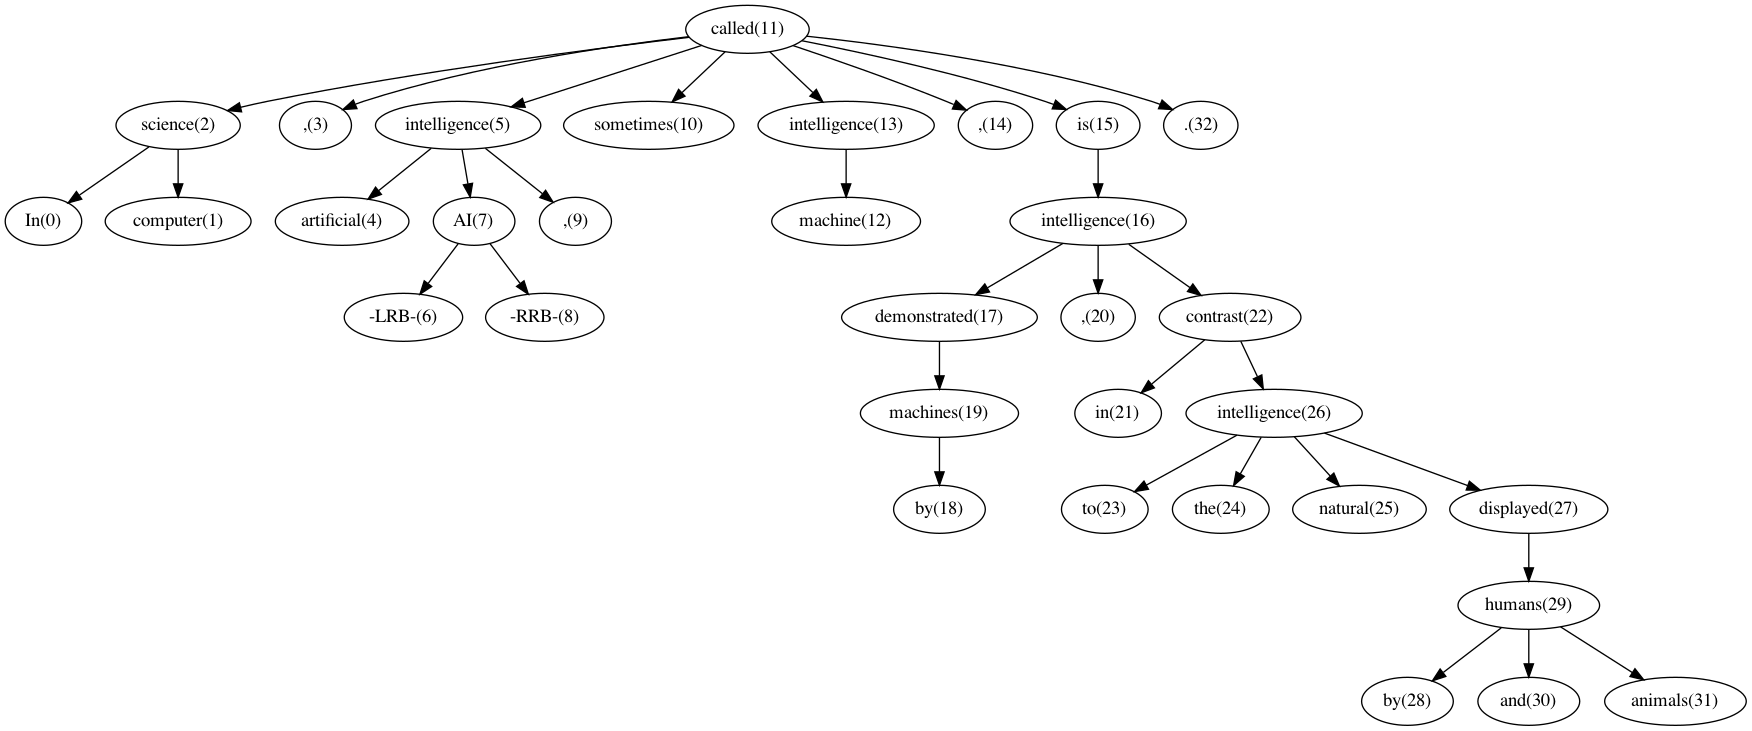

In [7]:
import pydot_ng as pydot
from IPython.display import Image,display_png
import statistics

def write_graph(sent):
    edges = []
#     graph = pydot.Dot('dependency_graph', graph_type='graph', bgcolor='lightyellow')
    for j in range(len(sent)):
        if str(sent[j].head) == '-1':
            continue
        gov = sent[j].head
        edges.append([str(sent[gov].word)+ '('+ str(gov) + ')', sent[j].word + '(' + str(j) + ')'])
                     
    graph = pydot.graph_from_edges(edges, directed=True)
    graph.write_png('output.png')
    display_png(Image('output.png'))


write_graph(sentences[0])

## problem 45

In [13]:
facts = []
for s in range(len(sentences)):
    sent = sentences[s]
    for i in range(len(sent)):
        if sent[i].pos != 'VBD':
            continue
        nsubj = []
        dobj = []
        for j in sent[i].children:
            if sent[j].dep == 'nsubj':
                if sent[j].word=='Rosenblatt':
                    print(s)
                nsubj.append(sent[j].word)
            if sent[j].dep == 'dobj':
                dobj.append(sent[j].word)
        for a in nsubj:
            for b in dobj:
                facts.append((a, sent[i].word, b))
#                 print(s)

for f in facts:
    if 'machines' in f[0]:
        print(f)
print(facts)

302
[('characters', 'raised', 'many'), ('this', 'led', 'researchers'), ('They', 'produced', 'programs'), ('governments', 'cut', 'research'), ('project', 'inspired', 'U.S'), ('development', 'enabled', 'development'), ('match', 'defeated', 'champions'), ('computers', 'enabled', 'advances'), ('AlphaGo', 'won', '4'), ('AlphaGo', 'won', 'games'), ('AlphaGo', 'won', 'match'), ('who', 'held', 'ranking'), ('This', 'marked', 'completion'), ('they', 'had', 'AI'), ('China', 'accelerated', 'funding'), ('that', 'undiscovered', 'swans'), ('they', 'advocated', 'violence'), ('researchers', 'developed', 'algorithms'), ('that', 'imitated', 'reasoning'), ('they', 'experienced', 'explosion'), ('DeepMind', 'developed', 'intelligence'), ('number', 'explored', 'connection'), ('Some', 'built', 'machines'), ('that', 'used', 'networks'), ('one', 'developed', 'style'), ('Simon', 'studied', 'skills'), ('work', 'laid', 'foundations'), ('team', 'used', 'results'), ('people', 'used', 'algorithms'), ('Schank', 'descr

## problem 46

In [14]:
facts = []
for s in range(len(sentences)):
    sent = sentences[s]
    for i in range(len(sent)):
        if sent[i].pos != 'VBD':
            continue
        nsubj = []
        dobj = []
        for j in sent[i].children:
            if sent[j].dep == 'nsubj':
                compound = [sent[m].word + ' ' + sent[j].word for m in sent[j].children if sent[m].dep == 'compound']
                if len(compound) > 0:
                    nsubj.extend(compound)
                else:
                    nsubj.append(sent[j].word)
                    
            if sent[j].dep == 'dobj':
                compound = [sent[m].word + ' ' + sent[j].word for m in sent[j].children if sent[m].dep == 'det']
                if len(compound) > 0:
                    dobj.extend(compound)
                else:
                    dobj.append(sent[j].word)
        for a in nsubj:
            for b in dobj:
                facts.append((a, sent[i].word, b))
#                 print(s)

for f in facts:
    if 'Rosenblatt' in f[0]:
        print(f)
print(len(facts))

('Frank Rosenblatt', 'invented', 'the perceptron')
73


## problem 47

In [20]:
facts = []
for s in range(len(sentences)):
    sent = sentences[s]
    for i in range(len(sent)):
        if sent[i].pos != 'VBN':
            continue
        nsubj = []
        dobj = []
        for j in sent[i].children:
            if sent[j].dep == 'nsubjpass':
                compound = [sent[m].word + ' ' + sent[j].word for m in sent[j].children if sent[m].dep == 'amod']
                if len(compound) > 0:
                    nsubj.extend(compound)
                else:
                    nsubj.append(sent[j].word)
                    
            if sent[j].dep == 'nmod':
                case = [sent[m].word for m in sent[j].children if sent[m].dep == 'case']
                if len(case)>1: 
                    print('more than 1', case)
                case = '_'.join(case)
                compound = [(case, sent[m].word + ' ' + sent[j].word) for m in sent[j].children if sent[m].dep == 'amod']
                if len(compound) > 0:
                    dobj.extend(compound)
                else:
                    dobj.append((case, sent[j].word))
        for a in nsubj:
            for b, c in dobj:
                facts.append((a, sent[i].word+'-'+b, c))

                
print(len(facts))
facts[19:20]

more than 1 ['except', 'to']
more than 1 ['along', 'with']
146


[('research', 'funded-by', 'Department')]

## problem 48

In [22]:
def path_to_noun(sent):
    for i in range(len(sent)):
        if sent[i].pos in noun_pos:
            gov = i
            path = []
            while gov!=-1:
                path.append(sent[gov].word)
                gov = sent[gov].head
            path.reverse()
            print(' -> '.join(path))
                

path_to_noun(sentences[0])
[vars(s) for s in sentences[0]]

called -> science -> computer
called -> science
called -> intelligence
called -> intelligence -> AI
called -> intelligence -> machine
called -> intelligence
called -> is -> intelligence
called -> is -> intelligence -> demonstrated -> machines
called -> is -> intelligence -> contrast
called -> is -> intelligence -> contrast -> intelligence
called -> is -> intelligence -> contrast -> intelligence -> displayed -> humans
called -> is -> intelligence -> contrast -> intelligence -> displayed -> humans -> animals


[{'word': 'In',
  'lemma': 'in',
  'pos': 'IN',
  'head': 2,
  'dep': 'case',
  'children': []},
 {'word': 'computer',
  'lemma': 'computer',
  'pos': 'NN',
  'head': 2,
  'dep': 'compound',
  'children': []},
 {'word': 'science',
  'lemma': 'science',
  'pos': 'NN',
  'head': 11,
  'dep': 'nmod',
  'children': [0, 1]},
 {'word': ',',
  'lemma': ',',
  'pos': ',',
  'head': 11,
  'dep': 'punct',
  'children': []},
 {'word': 'artificial',
  'lemma': 'artificial',
  'pos': 'JJ',
  'head': 5,
  'dep': 'amod',
  'children': []},
 {'word': 'intelligence',
  'lemma': 'intelligence',
  'pos': 'NN',
  'head': 11,
  'dep': 'nsubj',
  'children': [4, 7, 9]},
 {'word': '-LRB-',
  'lemma': '-lrb-',
  'pos': '-LRB-',
  'head': 7,
  'dep': 'punct',
  'children': []},
 {'word': 'AI',
  'lemma': 'ai',
  'pos': 'NN',
  'head': 5,
  'dep': 'appos',
  'children': [6, 8]},
 {'word': '-RRB-',
  'lemma': '-rrb-',
  'pos': '-RRB-',
  'head': 7,
  'dep': 'punct',
  'children': []},
 {'word': ',',
  'lemma': '

## problem 49

In [257]:
def paths_to_nouns(sent):
    paths = []
    for i in range(len(sent)):
        if sent[i].pos in noun_pos:
            gov = i
            path = []
            while gov!=-1:
                path.append(gov)
                gov = sent[gov].head
            paths.append(path)
    return paths

sent = sentences[0]
pth_nouns = paths_to_nouns(sent)


for i in range(len(pth_nouns)):
    for j in range(i+1, len(pth_nouns)):
        lenX = len(pth_nouns[i])
        lenY = len(pth_nouns[j])
        if lenX > lenY: X = pth_nouns[i]; Y = pth_nouns[j]
        else: X = pth_nouns[j]; Y = pth_nouns[i]
        shortest_path = ''
        if Y[0] in X:
            n = 1
            shortest_path += 'X'
            while X[n] != Y[0]:
                shortest_path += f' <- {sent[X[n]].word}'
                n+=1
            shortest_path += ' <- Y'
            print(shortest_path)
        else:
#             print(X, Y)
            common = 1
            while Y[common] not in X:
                common+=1
            shortest_path += 'X'
            n = 1
            while X[n] != Y[common]:
                shortest_path += f' <- {sent[X[n]].word}'
                n+=1
            shortest_path += ' <- '+ sent[Y[common]].word
            common-=1
            while common != 0:
                shortest_path+= f' -> {sent[Y[common]].word}'
                common -=1
            shortest_path += ' -> Y'
            print(shortest_path)
                
            

X <- Y
X <- science <- called -> Y
X <- intelligence <- called -> science -> Y
X <- intelligence <- called -> science -> Y
X <- science <- called -> Y
X <- is <- called -> science -> Y
X <- demonstrated <- intelligence <- is <- called -> science -> Y
X <- intelligence <- is <- called -> science -> Y
X <- contrast <- intelligence <- is <- called -> science -> Y
X <- displayed <- intelligence <- contrast <- intelligence <- is <- called -> science -> Y
X <- humans <- displayed <- intelligence <- contrast <- intelligence <- is <- called -> science -> Y
X <- called -> Y
X <- intelligence <- called -> Y
X <- intelligence <- called -> Y
X <- called -> Y
X <- is <- called -> Y
X <- demonstrated <- intelligence <- is <- called -> Y
X <- intelligence <- is <- called -> Y
X <- contrast <- intelligence <- is <- called -> Y
X <- displayed <- intelligence <- contrast <- intelligence <- is <- called -> Y
X <- humans <- displayed <- intelligence <- contrast <- intelligence <- is <- called -> Y
X <- Y


In [292]:
class Car(object):
    
    def __init__(self):
        self.positionx = 0
        self.positiony = 0
        length = None
        model = None
        
    def run(self, speed):
        self.positionx += speed*10
        self.positiony += speed*5
        return self.positionx, self.positiony

vipul_car = Car()
vipul_car.length = 2.5
vipul_car.model = 'Prius'
vipul_car

class Electric_car(Car):
    def __init__(self):
        super().__init__()
        self.charge = 100
    
    def run(self, speed):
        if self.charge < 10:
            print('No battery bro!')
        else:
            self.positionx += speed*10
            self.positiony += speed*5
            self.charge -= speed
            return self.positionx, self.positiony
    
    def charge_car(self):
        self.charge = 100
    
new_car = Electric_car()
new_car.run(12)
for i in range(10):
    print(new_car.run(10))
#     print(vipul_car.positionx, vipul_car.positiony)

(220, 110)
(320, 160)
(420, 210)
(520, 260)
(620, 310)
(720, 360)
(820, 410)
(920, 460)
No battery bro!
None
No battery bro!
None


In [23]:
for i in range(5):
    for j in range(i+1, 5):
        print(i, j)

0 1
0 2
0 3
0 4
1 2
1 3
1 4
2 3
2 4
3 4
